In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import joblib
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, RUSBoostClassifier
from imblearn.under_sampling import NearMiss
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour  
from imblearn.under_sampling import EditedNearestNeighbours #把多分类改成二分类了
from imblearn.under_sampling import RepeatedEditedNearestNeighbours#把多分类改成二分类了
from imblearn.under_sampling import AllKNN
from sklearn.metrics import matthews_corrcoef
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
import shap

In [3]:
# mpl.rcParams['font.sans-serif']=['SimHei']
# mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']


In [ ]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-背景信息数据.csv"
Dataset = pd.read_csv(fpath)
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

rfc = RandomForestClassifier(n_estimators=100,max_depth=30,min_samples_leaf=2,min_samples_split=2,random_state=random_state)

rfc.fit(x_train, y_train)
plt.rcParams["figure.figsize"] = (12, 8)

# 使用内联模式显示图像
%matplotlib inline

explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_train)
# 调整图像大小
plt.figure(figsize=(8, 8))

# 绘制SHAP总结图
shap.summary_plot(shap_values, x_train,max_display=20)

# 保存SHAP总结图
# plt.savefig('shap_summary_plot.png', bbox_inches='tight')

# 关闭图像，以防在之后的代码中再次显示
plt.close()
    
# sorted_feature_names = [x_train.columns[i] for i in shap.summary_plot(shap_values, x_train, plot=False)]

# # 输出前N个最重要的特征
# top_n_features = 20  # 可以根据你的需求调整此值

# print("\nSHAP总结图中的前N个最重要的特征：")
# for feature_name in sorted_feature_names[:top_n_features]:
#     print(feature_name)

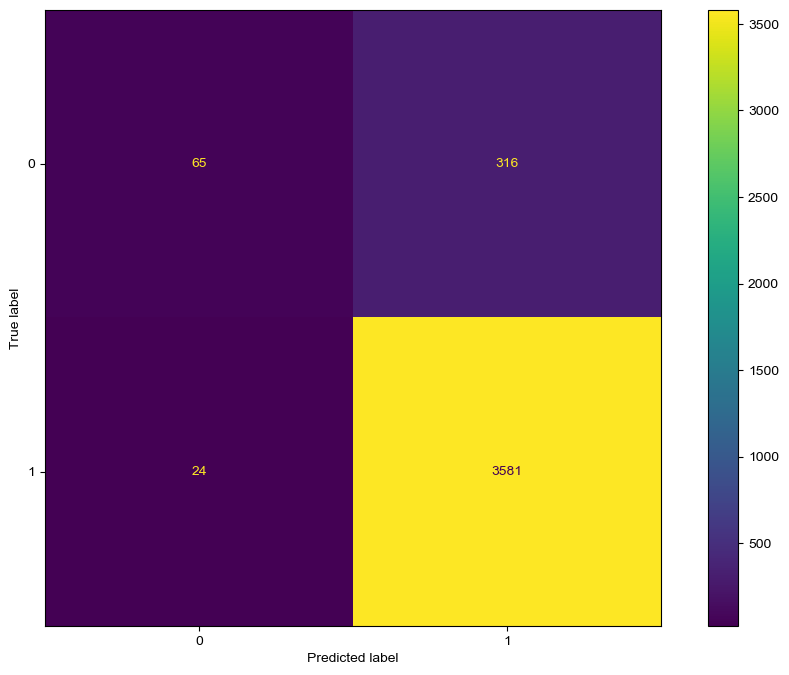

              precision    recall  f1-score   support

           0       0.73      0.17      0.28       381
           1       0.92      0.99      0.95      3605

    accuracy                           0.91      3986
   macro avg       0.82      0.58      0.62      3986
weighted avg       0.90      0.91      0.89      3986

Precision: 90.09%
Recall: 91.47%
Random Forest选择的重要特征: ['weight' 'Age' 'height' 'TMIncome' 'WORKTIME1' 'MAT1' 'WORKTIME4'
 'WorkingS' 'workyear1' 'PSQI4' 'major' 'EduBG' 'NumberCH7' 'MaritalS'
 'exeminp' 'exenumweek' 'DRINKING1' 'PSQI1' 'EPQas47' 'Politicalstate'
 'RELIGIOUSB' 'EPQas12' 'SMOKING3' 'ProfessionalRT' 'NumberCH' 'Post1'
 'EPQas30' 'Agegrp1' 'AFECQ1' 'Gender']


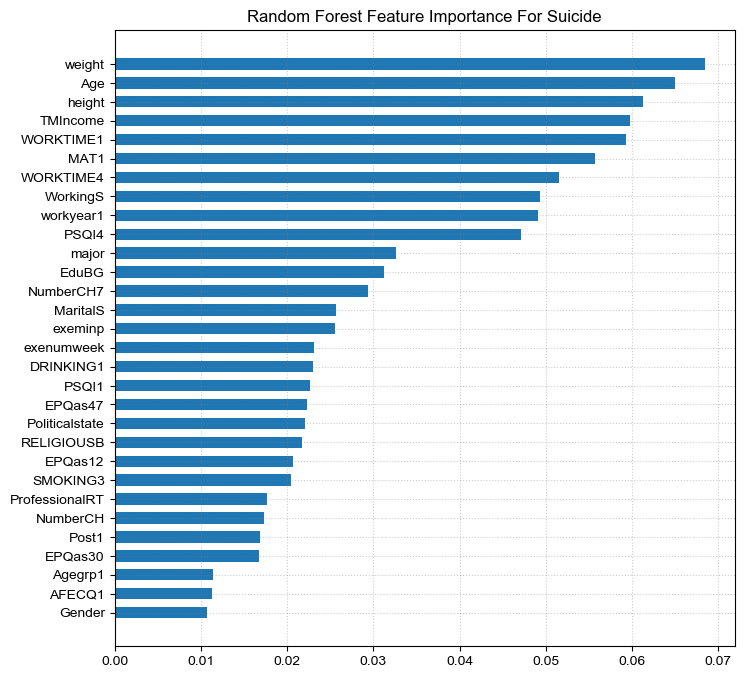

In [14]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-背景信息数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('anxiety', axis=1)

y = Dataset['suicide']
x = Dataset.drop('suicide', axis=1)

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 42
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

# cc = SMOTEENN(random_state=42)
# X_res, y_res = cc.fit_resample(x_train, y_train)
# print(Counter(y_res))

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=100,random_state=random_state)

bbc.fit(x_train, y_train)

# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Suicide")
plt.savefig("前"+str(number)+"名特征")
plt.show()


原始数据集类别分布： Counter({0: 6535, 1: 5725, 2: 788, 3: 236})
Matthews Correlation Coefficient: 0.21405754127261992
              precision    recall  f1-score   support

           0       0.61      0.72      0.66      1970
           1       0.54      0.51      0.53      1703
           2       0.67      0.01      0.02       246
           3       0.00      0.00      0.00        67

    accuracy                           0.58      3986
   macro avg       0.45      0.31      0.30      3986
weighted avg       0.57      0.58      0.55      3986

Precision: 57.13%
Recall: 57.88%
Random Forest选择的重要特征: ['WORKTIME4' 'WORKTIME1' 'weight' 'PSQI4' 'height' 'TMIncome' 'Age'
 'WorkingS' 'workyear1' 'major' 'MAT1' 'PSQI1' 'EduBG' 'exeminp'
 'NumberCH7' 'exenumweek' 'DRINKING1' 'Politicalstate' 'EPQas47'
 'NumberCH' 'Post1' 'ProfessionalRT' 'SMOKING3' 'EPQas30' 'EPQas12'
 'RELIGIOUSB' 'MaritalS' 'AFECQ1' 'Gender' 'Agegrp1']


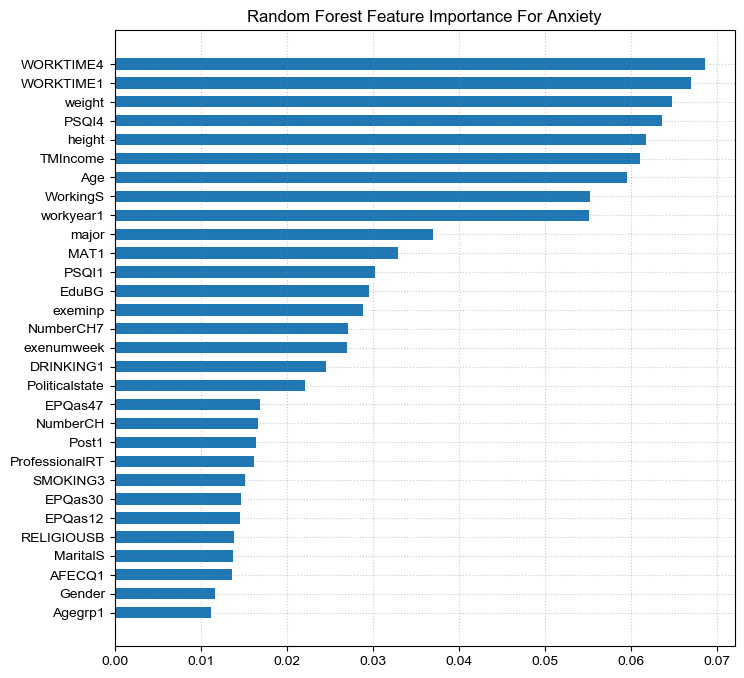

In [11]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-背景信息数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('depression', axis=1)
Dataset = Dataset.drop('suicide', axis=1)
y = Dataset['anxiety']
x = Dataset.drop('anxiety', axis=1)
print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 20
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

bbc = RandomForestClassifier(n_estimators=100,random_state=random_state)
bbc.fit(x_train, y_train)
# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
y_pred = bbc.predict(x_test)

# 计算Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred)

print("Matthews Correlation Coefficient:", mcc)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Anxiety")
plt.savefig("前"+str(number)+"名特征")
plt.show()


原始数据集类别分布： Counter({0: 10920, 1: 2077, 2: 287})


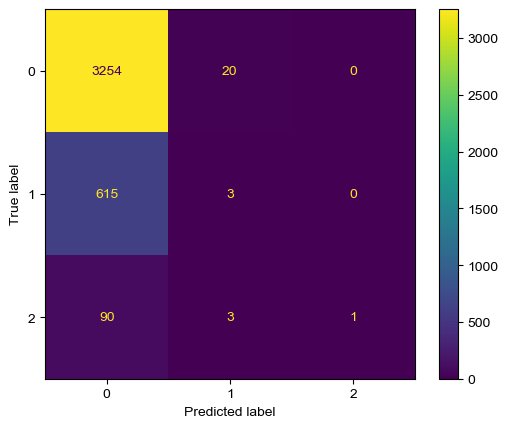

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      3274
           1       0.12      0.00      0.01       618
           2       1.00      0.01      0.02        94

    accuracy                           0.82      3986
   macro avg       0.65      0.34      0.31      3986
weighted avg       0.72      0.82      0.74      3986

Precision: 71.66%
Recall: 81.74%
Random Forest选择的重要特征: ['WORKTIME1' 'weight' 'WORKTIME4' 'height' 'TMIncome' 'Age' 'PSQI4'
 'WorkingS' 'workyear1' 'major' 'MAT1' 'EduBG' 'exeminp' 'NumberCH7'
 'PSQI1' 'exenumweek' 'DRINKING1' 'Politicalstate' 'SMOKING3'
 'ProfessionalRT' 'Post1' 'NumberCH' 'MaritalS' 'EPQas47' 'AFECQ1'
 'EPQas12' 'RELIGIOUSB' 'EPQas30' 'Gender' 'Agegrp1']


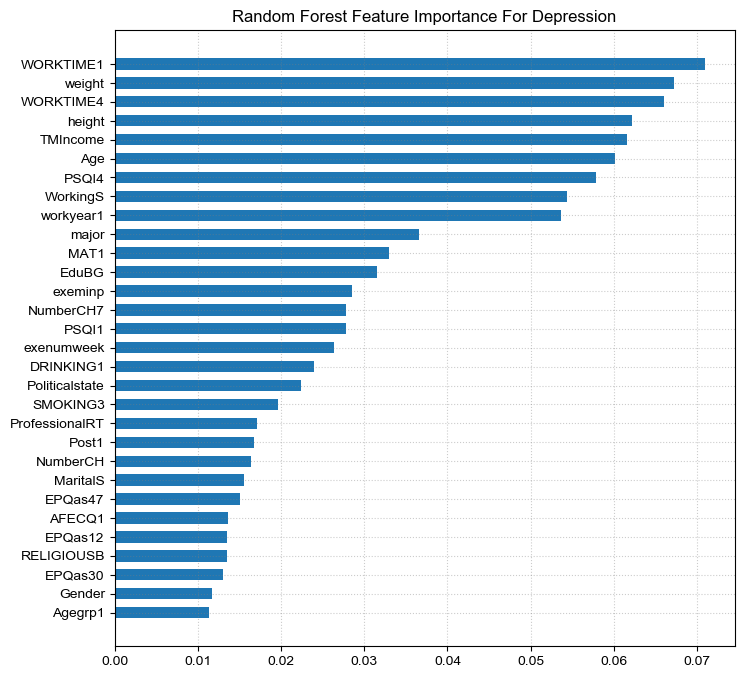

In [12]:
fpath = r"/Users/wangxiaoyan/Documents/wy/论文/git/scientific-worker-mental-health/data/all/2017科技人员心理健康-背景信息数据.csv"

Dataset = pd.read_csv(fpath)
number = 30
Dataset = Dataset.drop('anxiety', axis=1)
Dataset = Dataset.drop('suicide', axis=1)

y = Dataset['depression']
x = Dataset.drop('depression', axis=1)

print('原始数据集类别分布：', Counter(y))

feature_names = np.array(x.columns)

names = x.columns
names = list(names)
key = list(range(0, len(names)))
names_dict = dict(zip(key, names))
names_dicts = pd.DataFrame([names_dict])
random_state = 20
# cc = SMOTEENN(random_state=42)
# X_res, y_res = cc.fit_resample(x, y)
# print(Counter(y_res))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=random_state)

#--------------------------balanced bagging classifier-------------
bbc = RandomForestClassifier(n_estimators=100,random_state=random_state)
bbc.fit(x_train, y_train)
# import warnings
warnings.filterwarnings('ignore')
# Evaluate the model on the testing data
y_pred = bbc.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

# evaluate the performance of the model
score = bbc.score(x_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))

rf_feature_important = bbc.feature_importances_
rf_x_score = np.sort(rf_feature_important)[::-1]
rf_rank_idx  = np.argsort(rf_feature_important)[::-1]
rf_selected_rank_idx = rf_rank_idx[:number]
rf_selected_rank_names = names_dicts.loc[:, rf_selected_rank_idx]
rf_label = rf_selected_rank_names.values[0, :]

label = rf_selected_rank_names.values[0, :]
Datasetnew = Dataset[label]
print("Random Forest选择的重要特征:",rf_label)

# 随机森林可视化
plt.figure(figsize=(8, 8))
plt.barh(rf_label[::-1], rf_x_score[:number][::-1], 0.6, align='center')
plt.grid(ls=':', color='gray', alpha=0.4)
plt.title("Random Forest Feature Importance For Depression")
plt.savefig("前"+str(number)+"名特征")
plt.show()
